PROYECTO

---

### **Analisis de transacciones por producto**

*   AUTOR: DANIEL PRIETO
*   CURSO: Data Science I
*   COMISION: 74235

---

# 1. Abstract (250-500 palabras)

---

El presente proyecto tiene como objetivo analizar un conjunto de datos que contiene casi 10.000 registros de transacciones realizadas en distintos locales comerciales de Argentina que ofrecen servicios de Pago Fácil y Western Union con una segmentacion mensual desde 2024. A través del análisis exploratorio de los datos, se busca comprender el comportamiento de los usuarios, la distribución de las transacciones, la frecuencia de operaciones por ubicación geográfica y los patrones temporales asociados a estas operaciones.

El análisis se enmarca en la necesidad de mejorar la toma de decisiones comerciales, tales como la ubicación estratégica de nuevos puntos de servicio, la detección de anomalías, y la optimización de los recursos según la demanda de la zona. Mediante visualizaciones univariadas, bivariadas y multivariadas, se exploran variables clave como las transacciones realizadas, el tipo de operación (Pago Fácil o Western Union), la localización del comercio, y el periodo de las transacciones.

Además, se formulan preguntas e hipótesis que guían el análisis, tales como: ¿existen diferencias significativas en las transacciones operadas según el tipo de servicio? ¿Hay zonas geográficas con mayor concentración de operaciones? ¿Se pueden identificar patrones temporales (por ejemplo, el mes por estacionalidad en Argentina) que indiquen picos de actividad?

Se incluyen también resúmenes estadísticos e identificación de valores atípicos y faltantes, lo que permite evaluar la calidad del dataset y realizar los ajustes necesarios antes de abordar modelos predictivos o segmentaciones más avanzadas en futuras etapas del proyecto.

---

# 2. Preguntas / Hipótesis de interés

---

1. ¿El tipo de servicio (Pago Fácil vs. Western Union) influye significativamente en la cantidad transaccionada?
2. ¿Existen diferencias regionales marcadas en la cantidad de transacciones?
3. ¿Los meses que tienen mayor volumen de operaciones?
4. ¿Qué combinación de variables (zona geográfica, tipo de servicio, mes) predice mayores transacciones?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Dataset: Transacciones de Pago Fácil y Western Union (Argentina)
url = 'https://raw.githubusercontent.com/prieto-daniel/Data-Science-I/refs/heads/main/Datos/TH.csv'
df = pd.read_csv(url, delimiter=';')

# Como el archivo es una conversion de excel a csv, las fechas las tomo como INT, el origen del excel es 1899-12-30, como dia 0 para la base del calculo.
df['FECHA_DATE'] = pd.to_datetime(df['FECHA'], unit = 'D', origin='1899-12-30')
df['AÑO'] = df['FECHA_DATE'].dt.year
df["MES"] = df["FECHA_DATE"].dt.to_period("M")

In [13]:
# ----------------------------------
# 3. Diagnóstico de valores perdidos
# ----------------------------------
print("Valores perdidos por columna:")
print(df.isnull().sum())

Valores perdidos por columna:
ID            0
AGENTE        0
CANAL         0
SEGMENTO      0
ESTADO        0
ZONA          0
PROVINCIA     0
PERIODO       0
BP            0
QR            0
PEICI         0
PEICO         0
IOB           0
IIB           0
DOB           0
DIB           0
FECHA         0
FECHA_DATE    0
AÑO           0
dtype: int64


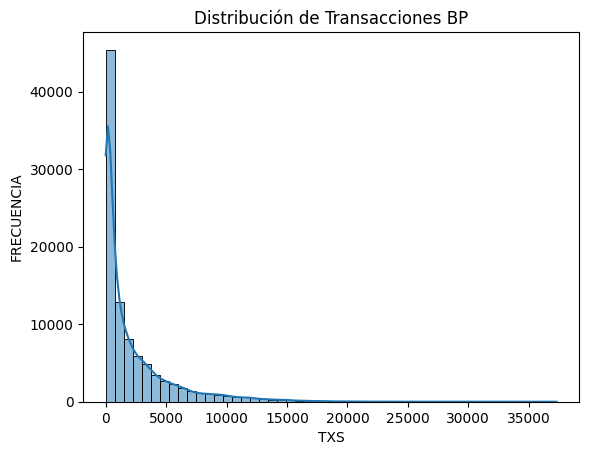

In [16]:
# ----------------------------------
# 4. Análisis Univariado
# ----------------------------------
sns.histplot(df["BP"], bins=50, kde=True)
plt.title("Distribución de Transacciones BP")
plt.xlabel("TXS")
plt.ylabel("FRECUENCIA")
plt.show()

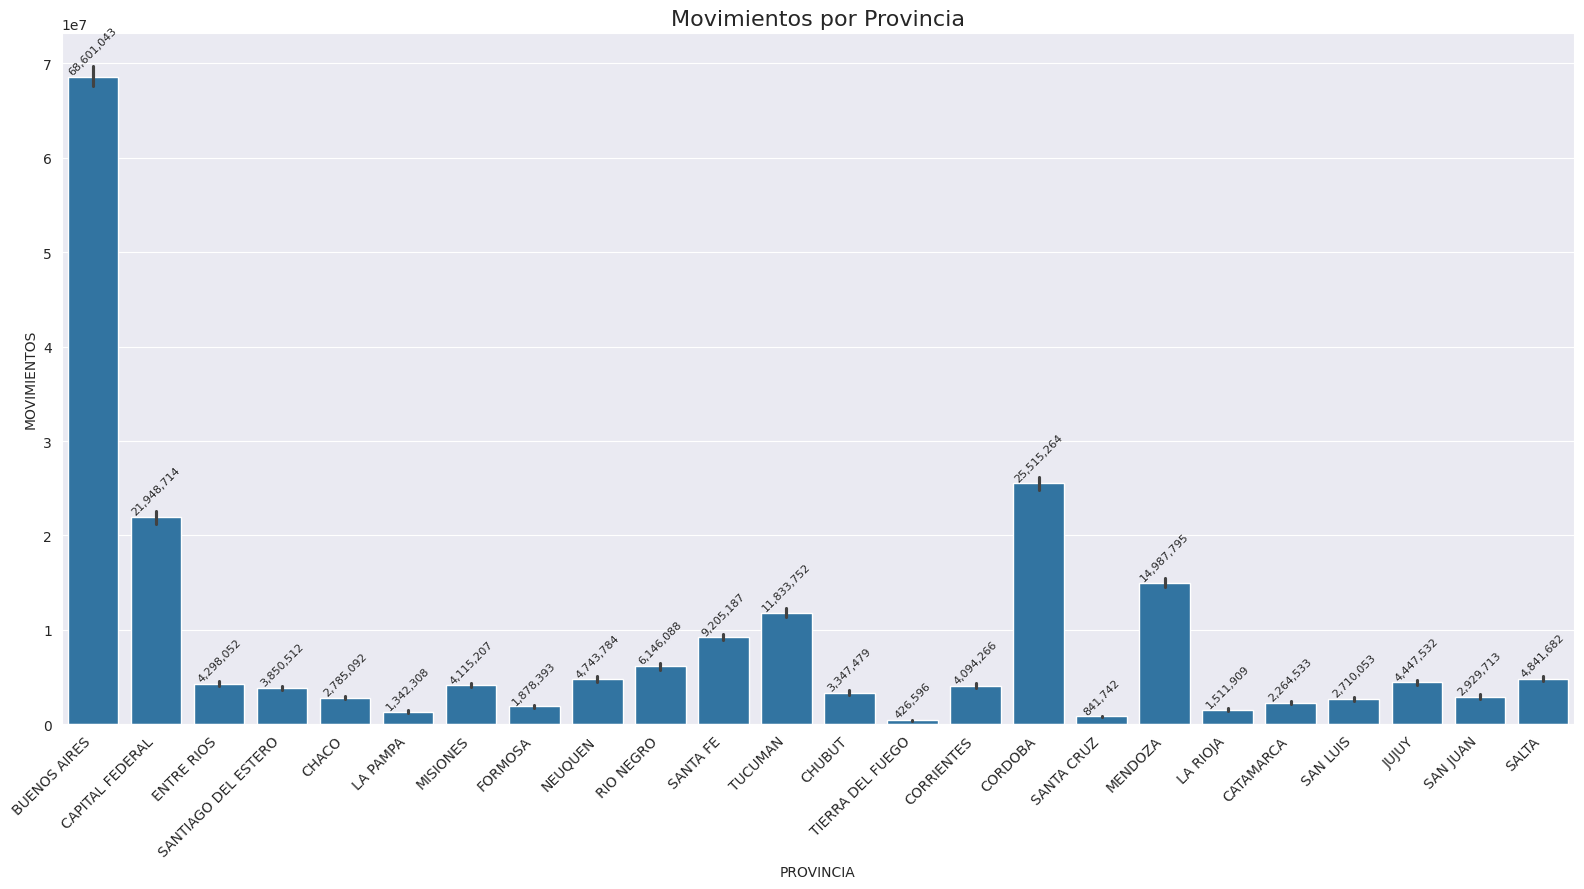

In [28]:
# ----------------------------------
# 5. Análisis Bivariado: Tipo de servicio vs. Monto
# ----------------------------------
plt.figure(figsize = (16, 9))
sns.set_style("darkgrid")
ax = sns.barplot(data = df, x = 'PROVINCIA', y = 'BP', estimator ='sum')
plt.title('Movimientos por Provincia', fontsize = 16)
plt.xlabel('PROVINCIA', fontsize = 10)
plt.ylabel('MOVIMIENTOS', fontsize = 10)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', fontsize=8, rotation=45)

plt.show()

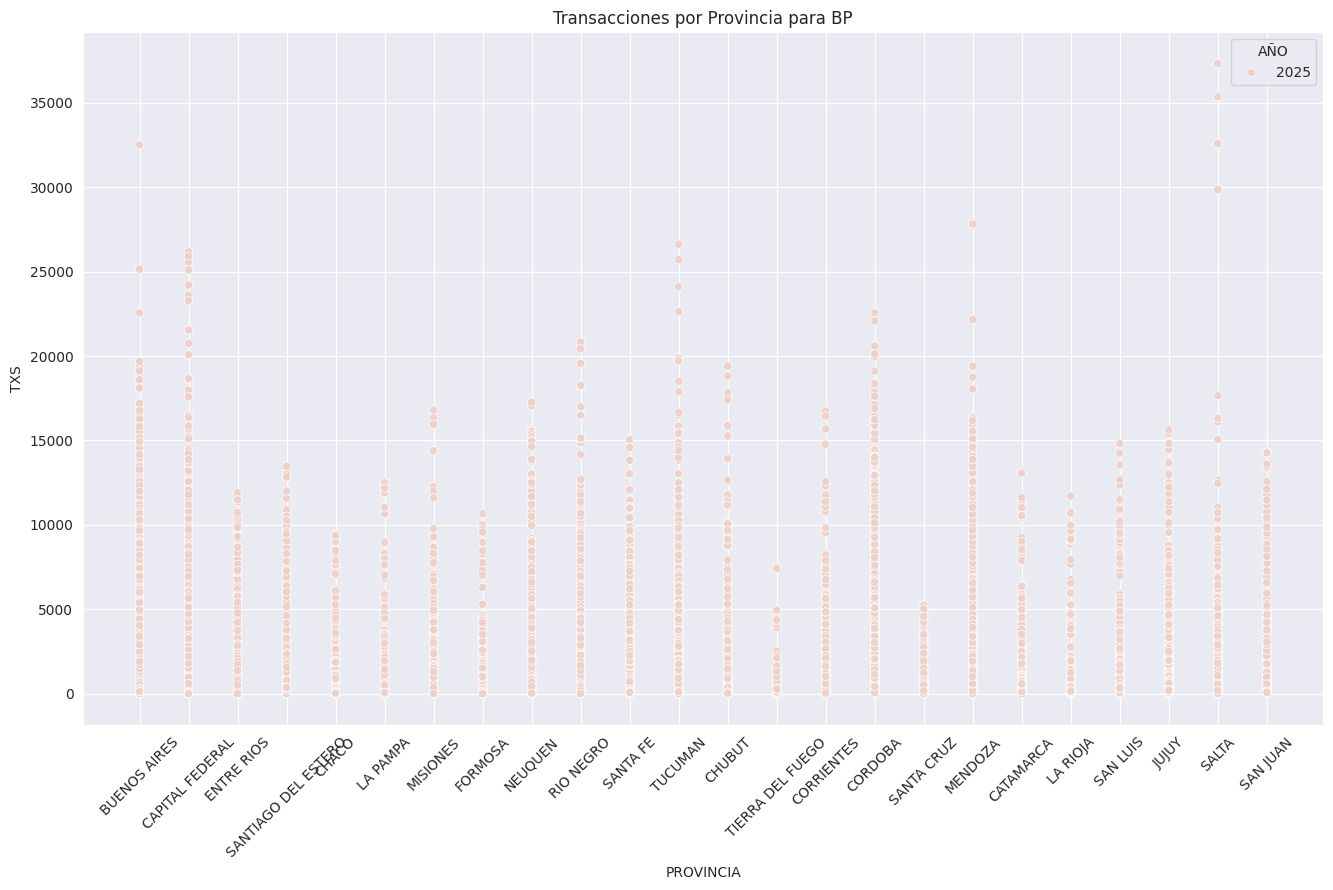

In [30]:
# ----------------------------------
# 6. Análisis Multivariado: Región, Tipo de Servicio y Monto
# ----------------------------------
# Excluyo periodos anteriores al año 2025
df_2025 = df[df['AÑO'] >= 2025]

plt.figure(figsize = (16, 9))
sns.set_style("darkgrid")
sns.scatterplot(data=df_2025, x="PROVINCIA", y="BP", hue="AÑO")
plt.title("Transacciones por Provincia para BP")
plt.xlabel("PROVINCIA")
plt.ylabel("TXS")
plt.xticks(rotation=45)
plt.show()

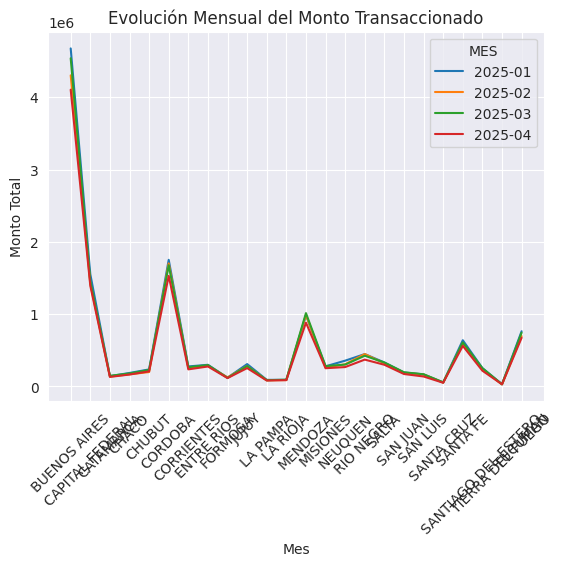

In [51]:
# ----------------------------------
# 7. Tendencia mensual
# ----------------------------------
# Excluyo periodos anteriores al año 2025
df_2025 = df[df['AÑO'] >= 2025]

mensual = df_2025.groupby(["PROVINCIA", "MES"]).agg({"BP": "sum"}).reset_index()

sns.lineplot(data=mensual, x="PROVINCIA", y="BP", hue="MES")
plt.title("Evolución Mensual del Monto Transaccionado")
plt.xlabel("Mes")
plt.ylabel("Monto Total")
plt.xticks(rotation=45)
plt.show()


DATASET-01

In [53]:
print(f'Rows: {len(df)}')
df.head()

Rows: 26718


,ID,AGENTE,CANAL,SEGMENTO,ESTADO,ZONA,PROVINCIA,PERIODO,BP,QR,PEICI,PEICO,IOB,IIB,DOB,DIB,FECHA,FECHA_DATE,AÑO,MES
14,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202501,0,0,0,0,20,12,0,0,45658,2025-01-01,2025,2025-01
15,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202502,0,0,0,0,7,7,0,0,45689,2025-02-01,2025,2025-02
16,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202503,0,0,0,0,8,12,0,0,45717,2025-03-01,2025,2025-03
17,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202504,0,0,0,0,12,9,0,0,45748,2025-04-01,2025,2025-04
31,QjA1ODQ=,Q09SUkVPIFBFRFJPIExVUk8=,Agte Corporativo,1.VIP,ACTIVO,INTERIOR,BUENOS AIRES,202501,0,0,0,0,19,17,0,0,45658,2025-01-01,2025,2025-01


DATASET-02

In [52]:
# Excluyo periodos anteriores al año 2025
df = df[df['AÑO'] >= 2025]

print(f'Rows: {len(df)}')
df.head()

Rows: 26718


,ID,AGENTE,CANAL,SEGMENTO,ESTADO,ZONA,PROVINCIA,PERIODO,BP,QR,PEICI,PEICO,IOB,IIB,DOB,DIB,FECHA,FECHA_DATE,AÑO,MES
14,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202501,0,0,0,0,20,12,0,0,45658,2025-01-01,2025,2025-01
15,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202502,0,0,0,0,7,7,0,0,45689,2025-02-01,2025,2025-02
16,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202503,0,0,0,0,8,12,0,0,45717,2025-03-01,2025,2025-03
17,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202504,0,0,0,0,12,9,0,0,45748,2025-04-01,2025,2025-04
31,QjA1ODQ=,Q09SUkVPIFBFRFJPIExVUk8=,Agte Corporativo,1.VIP,ACTIVO,INTERIOR,BUENOS AIRES,202501,0,0,0,0,19,17,0,0,45658,2025-01-01,2025,2025-01


DATASET-03

In [54]:
# Excluyo periodos anteriores al año 2025
df = df[df['AÑO'] >= 2025]

# Agrupacion por PROVINCIA y MES acumulando las transacciones BP
mensual = df_2025.groupby(["PROVINCIA", "MES"]).agg({"BP": "sum"}).reset_index()

mensual.head()

,PROVINCIA,MES,BP
0,BUENOS AIRES,2025-01,4676010
1,BUENOS AIRES,2025-02,4303467
2,BUENOS AIRES,2025-03,4539901
3,BUENOS AIRES,2025-04,4105018
4,CAPITAL FEDERAL,2025-01,1551987
